# Practica 2: Tipología y ciclo de vida de los datos.


## Carga del dataframe extraido desde Filmaffinity con Web Scraping.

In [1]:
#Importación de librerías.

import pandas as pd


In [2]:
puntuaciones = "C:/Users/Usuario/Downloads/puntuacionesFA (1).csv"

df = pd.read_csv(puntuaciones)


In [3]:
df

,titulo,año,duracion,pais,directores,guionistas,musicos,fotografos,actores,productores,generos,nota,votos,votacion
0,Joker,2019,121 min.,Estados Unidos,['Todd Phillips'],"['Todd Phillips', 'Scott Silver']",['Hildur Guðnadóttir'],['Lawrence Sher'],"['Joaquin Phoenix', 'Robert De Niro', 'Zazie B...","['DC Comics', 'DC Entertainment', 'Warner Bros...","['Thriller', 'Drama', 'Crimen', 'DC Comics', '...",8.0,69408.0,10
1,La ciudad de las estrellas (La La Land),2016,127 min.,Estados Unidos,['Damien Chazelle'],['Damien Chazelle'],['Justin Hurwitz'],['Linus Sandgren'],"['Emma Stone', 'Ryan Gosling', 'John Legend', ...","['Summit Entertainment', 'Gilbert Films', 'Imp...","['Musical', 'Romance', 'Comedia', 'Drama', 'Dr...",7.5,58319.0,10
2,Halt and Catch Fire (Serie de TV),2014,60 min.,Estados Unidos,"['Christopher Cantwell', 'Christopher C. Roger...","['Christopher Cantwell', 'Christopher C. Roger...",['Paul Haslinger'],"['Nelson Cragg', 'Evans Brown', 'Jeff Jur']","['Lee Pace', 'Scoot McNairy', 'Mackenzie Davis...",['AMC Studios'],"['Serie de TV', 'Drama', 'Internet / Informáti...",7.6,4517.0,10
3,BoJack Horseman (Serie de TV),2014,25 min.,Estados Unidos,"['Raphael Bob-Waksberg', 'JC Gonzalez', 'Amy W...","['Raphael Bob-Waksberg', 'Joe Lawson', 'Peter ...","['Grouplove', 'Jesse Novak']","['ShadowMachine Films', 'Tornante Company', 'N...",[],"['ShadowMachine Films', 'Tornante Company', 'N...","['Serie de TV', 'Animación', 'Comedia', 'Drama...",8.0,11520.0,10
4,It's Such a Beautiful Day (Película),2012,62 min.,Estados Unidos,['Don Hertzfeldt'],['Don Hertzfeldt'],['Varios'],['Don Hertzfeldt'],[],['Bitter Films'],"['Animación', 'Drama', 'Comedia dramática', 'A...",7.7,2781.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Ali G anda suelto,2002,88 min.,Reino Unido,['Mark Mylod'],"['Sacha Baron Cohen', 'Dan Mazer']",['Adam Fenton'],['Ashley Rowe'],"['Sacha Baron Cohen', 'Michael Gambon', 'Charl...","['Universal Pictures', 'Studiocanal', 'Working...","['Comedia', 'Comedia absurda', 'Película de cu...",5.2,36100.0,1
1937,Darkened Room (C),2002,8 min.,Estados Unidos,['David Lynch'],['David Lynch'],['Angelo Badalamenti'],['David Lynch'],"['Jordan Ladd', 'Etsuko Shikata', 'Cerina Vinc...",['Davidlynch.com'],"['Intriga', 'Drama', 'Surrealismo', 'Cine expe...",5.0,641.0,1
1938,¡Ja me maaten...!,2000,86 min.,España,['Juan Muñoz'],"['Luis Lázaro', 'Juan Muñoz', 'Cristóbal Ruiz']","['Eugenio Fernández', 'Juan Muñoz']",['Fernando Arribas'],"['Juan Muñoz', 'José Carabias', 'Paz Aragón', ...","['Don Oriol S.A', 'World Entertaiments']",['Comedia'],2.0,4379.0,1
1939,Battle Royale,2000,114 min.,Japón,['Kinji Fukasaku'],"['Kenta Fukasaku', 'Koushun Takami']",['Masamichi Amano'],['Katsumi Yanagishima'],"['Aki Maeda', 'Tatsuya Fujiwara', 'Chiaki Kuri...","['Kobi Co.', 'AM Associates', 'Fukasaku-gumi',...","['Thriller', 'Acción', 'Colegios & Universidad...",6.5,35461.0,1


## Detección y limpieza de valores nulos

In [4]:
#Localizamos la presencia de nulos:
print(df.isnull().sum())

titulo         0
año            0
duracion       2
pais           0
directores     0
guionistas     0
musicos        0
fotografos     0
actores        0
productores    0
generos        0
nota           3
votos          3
votacion       0
dtype: int64


Eliminamos las películas del usuario que no se han puntuado.

In [5]:
#Existencia de datos vacíos:


filas_con_nota_nula = df.loc[df['nota'].isnull()]


print(filas_con_nota_nula.isnull().sum())
filas_con_nota_nula

titulo         0
año            0
duracion       0
pais           0
directores     0
guionistas     0
musicos        0
fotografos     0
actores        0
productores    0
generos        0
nota           3
votos          3
votacion       0
dtype: int64


,titulo,año,duracion,pais,directores,guionistas,musicos,fotografos,actores,productores,generos,nota,votos,votacion
884,Few Words,2012,56 min.,Francia,['Matt Pain'],[],[],[],[],"['Process Film', 'Quicksilver Europe']","['Documental', 'Mediometraje', 'Esquí']",NaN,NaN,6
1097,Fantomcat (Serie de TV),1995,30 min.,Reino Unido,"['Brian Cosgrove', 'Ben Turner', 'Andy Roper']",[],[],[],[],['Cosgrove Hall Films'],"['Serie de TV', 'Animación', 'Aventuras', 'Gat...",NaN,NaN,6
1329,Behind the Door (C),2011,11 min.,Noruega,"['Helga Fjeldså', 'Stein-Christian Fagerbakken']",['Helga Fjeldså'],['Trigve Nielsen'],['Stein-Christian Fagerbakken'],[],[],"['Animación', 'Terror', 'Stop Motion', 'Cortom...",NaN,NaN,5


Eliminamos las películas sin valoración ya que no tienen valor estadístico.

In [6]:
df_sin_votos_nulos = df.dropna(subset=['nota'])

print(df_sin_votos_nulos.isnull().sum())
df_sin_votos_nulos
df_sin_votos_nulos.info()

titulo         0
año            0
duracion       2
pais           0
directores     0
guionistas     0
musicos        0
fotografos     0
actores        0
productores    0
generos        0
nota           0
votos          0
votacion       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1940
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titulo       1938 non-null   object 
 1   año          1938 non-null   int64  
 2   duracion     1936 non-null   object 
 3   pais         1938 non-null   object 
 4   directores   1938 non-null   object 
 5   guionistas   1938 non-null   object 
 6   musicos      1938 non-null   object 
 7   fotografos   1938 non-null   object 
 8   actores      1938 non-null   object 
 9   productores  1938 non-null   object 
 10  generos      1938 non-null   object 
 11  nota         1938 non-null   float64
 12  votos        1938 non-null   float64
 13  votacio

Sustituimos los valores de "duracion" por una media de los valores de la columna.

In [7]:

# Rellenamos los valores nulos en la columna "duracion" con cero
df_sin_votos_nulos['duracion'].fillna("0", inplace=True)

# Eliminamos los caracteres no numéricos de la columna "duracion"
df_sin_votos_nulos['duracion'] = df_sin_votos_nulos['duracion'].str.replace(r'\D+', '', regex=True)

# Convertimos la columna "duracion" a tipo entero
df_sin_votos_nulos['duracion'] = df_sin_votos_nulos['duracion'].astype(int)

# Mostramos el DataFrame con la columna "duracion" convertida a entero
print(df_sin_votos_nulos)

                                        titulo   año  duracion  \
0                                       Joker   2019       121   
1     La ciudad de las estrellas (La La Land)   2016       127   
2            Halt and Catch Fire (Serie de TV)  2014        60   
3                BoJack Horseman (Serie de TV)  2014        25   
4        It's Such a Beautiful Day (Película)   2012        62   
...                                        ...   ...       ...   
1936                        Ali G anda suelto   2002        88   
1937                         Darkened Room (C)  2002         8   
1938                        ¡Ja me maaten...!   2000        86   
1939                            Battle Royale   2000       114   
1940                  Bambi Meets Godzilla (C)  1969         2   

                pais                                         directores  \
0     Estados Unidos                                  ['Todd Phillips']   
1     Estados Unidos                                ['Dam

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14244\2340143202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_votos_nulos['duracion'].fillna("0", inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14244\2340143202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_votos_nulos['duracion'] = df_sin_votos_nulos['duracion'].str.replace(r'\D+', '', regex=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14244\2340143202.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [8]:
df_sin_votos_nulos

,titulo,año,duracion,pais,directores,guionistas,musicos,fotografos,actores,productores,generos,nota,votos,votacion
0,Joker,2019,121,Estados Unidos,['Todd Phillips'],"['Todd Phillips', 'Scott Silver']",['Hildur Guðnadóttir'],['Lawrence Sher'],"['Joaquin Phoenix', 'Robert De Niro', 'Zazie B...","['DC Comics', 'DC Entertainment', 'Warner Bros...","['Thriller', 'Drama', 'Crimen', 'DC Comics', '...",8.0,69408.0,10
1,La ciudad de las estrellas (La La Land),2016,127,Estados Unidos,['Damien Chazelle'],['Damien Chazelle'],['Justin Hurwitz'],['Linus Sandgren'],"['Emma Stone', 'Ryan Gosling', 'John Legend', ...","['Summit Entertainment', 'Gilbert Films', 'Imp...","['Musical', 'Romance', 'Comedia', 'Drama', 'Dr...",7.5,58319.0,10
2,Halt and Catch Fire (Serie de TV),2014,60,Estados Unidos,"['Christopher Cantwell', 'Christopher C. Roger...","['Christopher Cantwell', 'Christopher C. Roger...",['Paul Haslinger'],"['Nelson Cragg', 'Evans Brown', 'Jeff Jur']","['Lee Pace', 'Scoot McNairy', 'Mackenzie Davis...",['AMC Studios'],"['Serie de TV', 'Drama', 'Internet / Informáti...",7.6,4517.0,10
3,BoJack Horseman (Serie de TV),2014,25,Estados Unidos,"['Raphael Bob-Waksberg', 'JC Gonzalez', 'Amy W...","['Raphael Bob-Waksberg', 'Joe Lawson', 'Peter ...","['Grouplove', 'Jesse Novak']","['ShadowMachine Films', 'Tornante Company', 'N...",[],"['ShadowMachine Films', 'Tornante Company', 'N...","['Serie de TV', 'Animación', 'Comedia', 'Drama...",8.0,11520.0,10
4,It's Such a Beautiful Day (Película),2012,62,Estados Unidos,['Don Hertzfeldt'],['Don Hertzfeldt'],['Varios'],['Don Hertzfeldt'],[],['Bitter Films'],"['Animación', 'Drama', 'Comedia dramática', 'A...",7.7,2781.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Ali G anda suelto,2002,88,Reino Unido,['Mark Mylod'],"['Sacha Baron Cohen', 'Dan Mazer']",['Adam Fenton'],['Ashley Rowe'],"['Sacha Baron Cohen', 'Michael Gambon', 'Charl...","['Universal Pictures', 'Studiocanal', 'Working...","['Comedia', 'Comedia absurda', 'Película de cu...",5.2,36100.0,1
1937,Darkened Room (C),2002,8,Estados Unidos,['David Lynch'],['David Lynch'],['Angelo Badalamenti'],['David Lynch'],"['Jordan Ladd', 'Etsuko Shikata', 'Cerina Vinc...",['Davidlynch.com'],"['Intriga', 'Drama', 'Surrealismo', 'Cine expe...",5.0,641.0,1
1938,¡Ja me maaten...!,2000,86,España,['Juan Muñoz'],"['Luis Lázaro', 'Juan Muñoz', 'Cristóbal Ruiz']","['Eugenio Fernández', 'Juan Muñoz']",['Fernando Arribas'],"['Juan Muñoz', 'José Carabias', 'Paz Aragón', ...","['Don Oriol S.A', 'World Entertaiments']",['Comedia'],2.0,4379.0,1
1939,Battle Royale,2000,114,Japón,['Kinji Fukasaku'],"['Kenta Fukasaku', 'Koushun Takami']",['Masamichi Amano'],['Katsumi Yanagishima'],"['Aki Maeda', 'Tatsuya Fujiwara', 'Chiaki Kuri...","['Kobi Co.', 'AM Associates', 'Fukasaku-gumi',...","['Thriller', 'Acción', 'Colegios & Universidad...",6.5,35461.0,1


Para los valores nulos en la duración vamos a sustituirlos por una media de los valores de la misma columna.

In [9]:
# Calculamos la media de los valores de la columna "duracion"
media_duracion = df_sin_votos_nulos['duracion'].mean()

# Sustituimos los valores de duración igual a cero por la media
df_sin_votos_nulos.loc[df_sin_votos_nulos['duracion'] == 0, 'duracion'] = media_duracion

# Mostramos el DataFrame actualizado
df_sin_votos_nulos

,titulo,año,duracion,pais,directores,guionistas,musicos,fotografos,actores,productores,generos,nota,votos,votacion
0,Joker,2019,121.0,Estados Unidos,['Todd Phillips'],"['Todd Phillips', 'Scott Silver']",['Hildur Guðnadóttir'],['Lawrence Sher'],"['Joaquin Phoenix', 'Robert De Niro', 'Zazie B...","['DC Comics', 'DC Entertainment', 'Warner Bros...","['Thriller', 'Drama', 'Crimen', 'DC Comics', '...",8.0,69408.0,10
1,La ciudad de las estrellas (La La Land),2016,127.0,Estados Unidos,['Damien Chazelle'],['Damien Chazelle'],['Justin Hurwitz'],['Linus Sandgren'],"['Emma Stone', 'Ryan Gosling', 'John Legend', ...","['Summit Entertainment', 'Gilbert Films', 'Imp...","['Musical', 'Romance', 'Comedia', 'Drama', 'Dr...",7.5,58319.0,10
2,Halt and Catch Fire (Serie de TV),2014,60.0,Estados Unidos,"['Christopher Cantwell', 'Christopher C. Roger...","['Christopher Cantwell', 'Christopher C. Roger...",['Paul Haslinger'],"['Nelson Cragg', 'Evans Brown', 'Jeff Jur']","['Lee Pace', 'Scoot McNairy', 'Mackenzie Davis...",['AMC Studios'],"['Serie de TV', 'Drama', 'Internet / Informáti...",7.6,4517.0,10
3,BoJack Horseman (Serie de TV),2014,25.0,Estados Unidos,"['Raphael Bob-Waksberg', 'JC Gonzalez', 'Amy W...","['Raphael Bob-Waksberg', 'Joe Lawson', 'Peter ...","['Grouplove', 'Jesse Novak']","['ShadowMachine Films', 'Tornante Company', 'N...",[],"['ShadowMachine Films', 'Tornante Company', 'N...","['Serie de TV', 'Animación', 'Comedia', 'Drama...",8.0,11520.0,10
4,It's Such a Beautiful Day (Película),2012,62.0,Estados Unidos,['Don Hertzfeldt'],['Don Hertzfeldt'],['Varios'],['Don Hertzfeldt'],[],['Bitter Films'],"['Animación', 'Drama', 'Comedia dramática', 'A...",7.7,2781.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Ali G anda suelto,2002,88.0,Reino Unido,['Mark Mylod'],"['Sacha Baron Cohen', 'Dan Mazer']",['Adam Fenton'],['Ashley Rowe'],"['Sacha Baron Cohen', 'Michael Gambon', 'Charl...","['Universal Pictures', 'Studiocanal', 'Working...","['Comedia', 'Comedia absurda', 'Película de cu...",5.2,36100.0,1
1937,Darkened Room (C),2002,8.0,Estados Unidos,['David Lynch'],['David Lynch'],['Angelo Badalamenti'],['David Lynch'],"['Jordan Ladd', 'Etsuko Shikata', 'Cerina Vinc...",['Davidlynch.com'],"['Intriga', 'Drama', 'Surrealismo', 'Cine expe...",5.0,641.0,1
1938,¡Ja me maaten...!,2000,86.0,España,['Juan Muñoz'],"['Luis Lázaro', 'Juan Muñoz', 'Cristóbal Ruiz']","['Eugenio Fernández', 'Juan Muñoz']",['Fernando Arribas'],"['Juan Muñoz', 'José Carabias', 'Paz Aragón', ...","['Don Oriol S.A', 'World Entertaiments']",['Comedia'],2.0,4379.0,1
1939,Battle Royale,2000,114.0,Japón,['Kinji Fukasaku'],"['Kenta Fukasaku', 'Koushun Takami']",['Masamichi Amano'],['Katsumi Yanagishima'],"['Aki Maeda', 'Tatsuya Fujiwara', 'Chiaki Kuri...","['Kobi Co.', 'AM Associates', 'Fukasaku-gumi',...","['Thriller', 'Acción', 'Colegios & Universidad...",6.5,35461.0,1


Comprobamos la sustitución de estos nulos

In [10]:
print(df_sin_votos_nulos.isnull().sum())

titulo         0
año            0
duracion       0
pais           0
directores     0
guionistas     0
musicos        0
fotografos     0
actores        0
productores    0
generos        0
nota           0
votos          0
votacion       0
dtype: int64


## Detección de valores extremos.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14244\2304985758.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14244\2304985758.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14244\2304985758.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


Valores extremos en la columna año:
18      1962
19      1960
20      1957
21      1957
22      1955
        ... 
1842    1960
1843    1959
1844    1958
1845    1956
1846    1951
Name: año, Length: 180, dtype: int64

Valores extremos en la columna duracion:
3        25.0
9       195.0
12       20.0
13      195.0
31        5.0
        ...  
1931     30.0
1932     22.0
1934      2.0
1937      8.0
1940      2.0
Name: duracion, Length: 250, dtype: float64

Valores extremos en la columna nota:
826     3.4
1459    3.0
1467    3.4
1468    2.9
1551    3.3
1689    3.4
1786    3.4
1814    3.4
1826    2.9
1831    3.4
1836    2.8
1879    3.3
1884    3.3
1903    3.0
1911    3.2
1914    1.5
1917    3.3
1922    3.4
1925    3.4
1928    2.2
1931    2.8
1932    2.3
1934    2.4
1938    2.0
Name: nota, dtype: float64

Valores extremos en la columna votos:
5       115948.0
7       135926.0
9       180643.0
10      174377.0
11      161434.0
          ...   
1655    115216.0
1673    110576.0
1690    139755.0

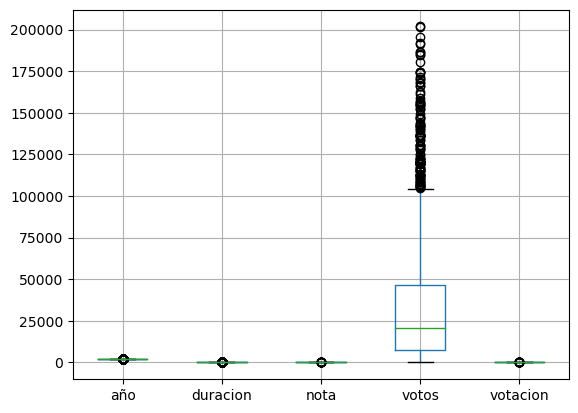

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_sin_votos_nulos

# Calculamos el rango intercuartílico para cada columna numérica
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identificamos los valores extremos utilizando el rango intercuartílico
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Generamos un diagrama de caja para cada columna numérica
df.boxplot()

# Mostramos los valores extremos
for column in df.columns:
    column_outliers = outliers[column]
    if column_outliers.any():
        print(f"Valores extremos en la columna {column}:")
        print(df[column][column_outliers])
        print()

# Mostramos los diagramas de caja
plt.show()

Solo se pueden apreciar valores extremos significativos en la columna de votos de la comunidad. Estos valores extremos no merece la pena tratarlos por ahora ya que son datos relevantes de las películas más vistas por los usuarios de la plataforma.